In [ ]:
# Membaca beberapa baris pertama dari file CSV
df = pd.read_csv(file_path)
print("Beberapa baris pertama data:")
print(df.head())


Beberapa baris pertama data:
                         Game   Copies sold       Release date  \
0         Marvel's Spider-Man    20 million  September 7, 2018   
1                  God of War  19.5 million     April 20, 2018   
2  Uncharted 4: A Thief's End    16 million       May 10, 2016   
3    The Witcher 3: Wild Hunt  10.8 million       May 18, 2015   
4      The Last of Us Part II    10 million      June 19, 2020   

                           Genre(s)         Developer(s)  \
0                  Action-adventure      Insomniac Games   
1   Action-adventure hack and slash  Santa Monica Studio   
2                  Action-adventure          Naughty Dog   
3               Action role-playing       CD Projekt Red   
4  Action-adventure survival horror          Naughty Dog   

                     Publisher(s)  
0  Sony Interactive Entertainment  
1  Sony Interactive Entertainment  
2  Sony Interactive Entertainment  
3                      CD Projekt  
4  Sony Interactive Entertainment

In [ ]:
# Cek tipe data kolom
print("Tipe data kolom 'Copies sold':", df['Copies sold'].dtype)

# Tampilkan nilai kosong sebelum pembersihan
print("Nilai kosong di kolom 'Copies sold' sebelum pembersihan:")
print(df[df['Copies sold'].isna()])


Tipe data kolom 'Copies sold': object
Nilai kosong di kolom 'Copies sold' sebelum pembersihan:
Empty DataFrame
Columns: [Game, Copies sold, Release date, Genre(s), Developer(s), Publisher(s)]
Index: []


In [ ]:
# Tampilkan data setelah konversi dan pembersihan
df['Copies sold'] = pd.to_numeric(df['Copies sold'], errors='coerce')
df.dropna(subset=['Copies sold'], inplace=True)

print("Data setelah pembersihan:")
print(df.head())
print(f"Ukuran data setelah pembersihan: {df.shape}")


Data setelah pembersihan:
Empty DataFrame
Columns: [Game, Copies sold, Release date, Genre(s), Developer(s), Publisher(s)]
Index: []
Ukuran data setelah pembersihan: (0, 6)


In [ ]:
# Menggunakan data sampel kecil untuk testing
sample_data = {
    'Game': ['Game1', 'Game2', 'Game3'],
    'Copies sold': [1500000, 500000, 2000000],
    'Release date': ['2024-01-01', '2023-12-01', '2022-11-01'],
    'Genre(s)': ['Action', 'Adventure', 'RPG'],
    'Developer(s)': ['Dev1', 'Dev2', 'Dev3'],
    'Publisher(s)': ['Pub1', 'Pub2', 'Pub3']
}
df = pd.DataFrame(sample_data)
df['Copies sold'] = pd.to_numeric(df['Copies sold'], errors='coerce')
df.dropna(subset=['Copies sold'], inplace=True)

print("Data sampel:")
print(df)


Data sampel:
    Game  Copies sold Release date   Genre(s) Developer(s) Publisher(s)
0  Game1      1500000   2024-01-01     Action         Dev1         Pub1
1  Game2       500000   2023-12-01  Adventure         Dev2         Pub2
2  Game3      2000000   2022-11-01        RPG         Dev3         Pub3


|--- Copies sold <= -0.13
|   |--- class: False
|--- Copies sold >  -0.13
|   |--- class: True



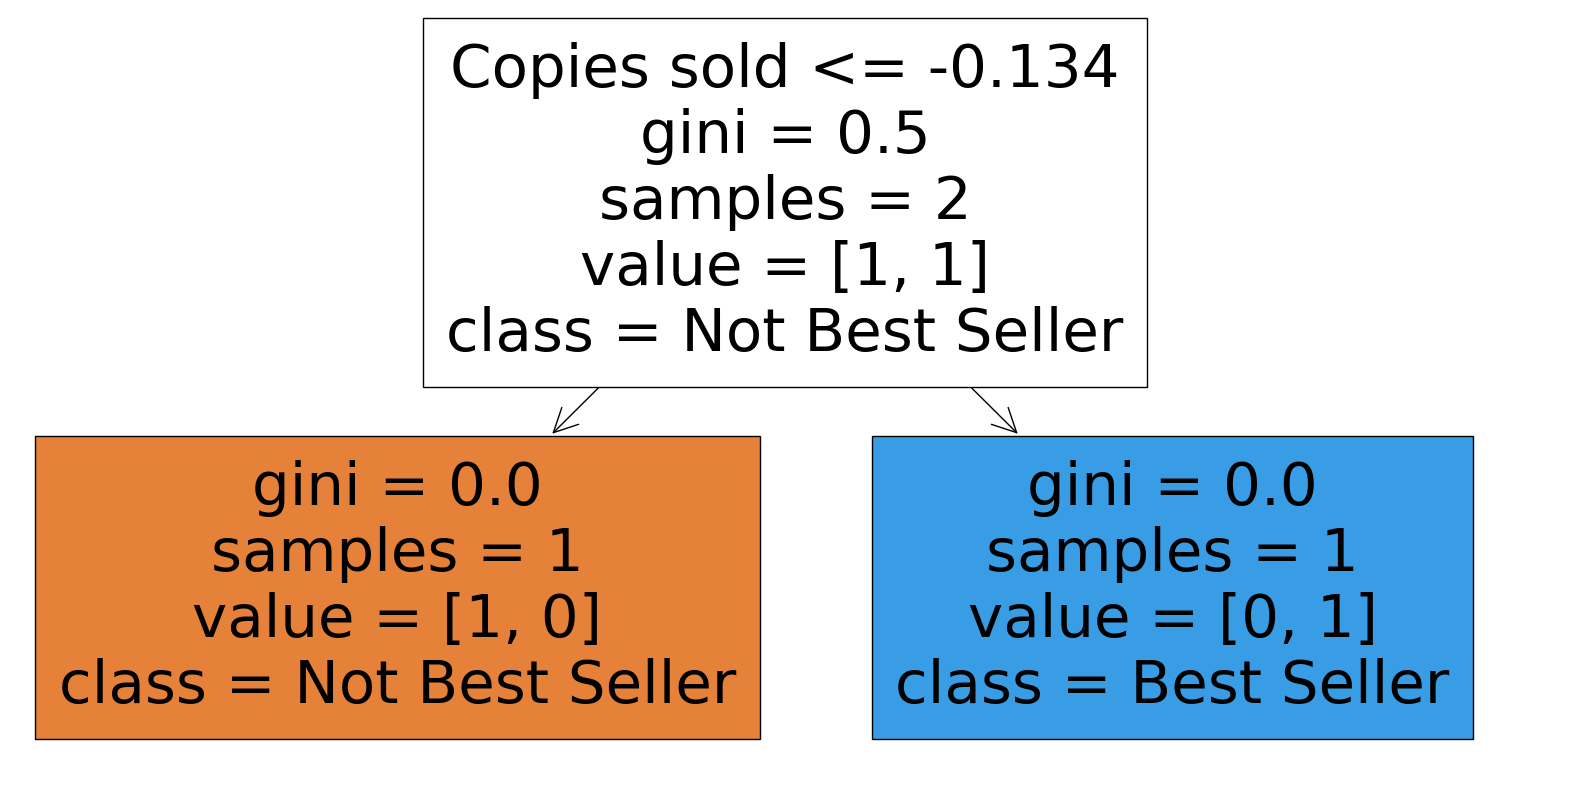

In [ ]:
# Menyiapkan data untuk pelatihan
X = df[['Copies sold']]
y = df['Copies sold'] > threshold

# Normalisasi fitur
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Melatih model Decision Tree
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Menampilkan pohon keputusan dalam bentuk teks
print(export_text(clf, feature_names=['Copies sold']))

# Visualisasi decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf, feature_names=['Copies sold'], class_names=['Not Best Seller', 'Best Seller'], filled=True, ax=ax)
plt.show()


Beberapa baris pertama data:
                         Game   Copies sold       Release date  \
0         Marvel's Spider-Man    20 million  September 7, 2018   
1                  God of War  19.5 million     April 20, 2018   
2  Uncharted 4: A Thief's End    16 million       May 10, 2016   
3    The Witcher 3: Wild Hunt  10.8 million       May 18, 2015   
4      The Last of Us Part II    10 million      June 19, 2020   

                           Genre(s)         Developer(s)  \
0                  Action-adventure      Insomniac Games   
1   Action-adventure hack and slash  Santa Monica Studio   
2                  Action-adventure          Naughty Dog   
3               Action role-playing       CD Projekt Red   
4  Action-adventure survival horror          Naughty Dog   

                     Publisher(s)  
0  Sony Interactive Entertainment  
1  Sony Interactive Entertainment  
2  Sony Interactive Entertainment  
3                      CD Projekt  
4  Sony Interactive Entertainment

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil clustering:
                         Game  Copies sold Release date  Genre(s)  \
0         Marvel's Spider-Man   20000000.0   2018-09-07         1   
1                  God of War   19500000.0   2018-04-20         2   
2  Uncharted 4: A Thief's End   16000000.0   2016-05-10         1   
3    The Witcher 3: Wild Hunt   10800000.0   2015-05-18         0   
4      The Last of Us Part II   10000000.0   2020-06-19         4   

   Developer(s)  Publisher(s)  Release year  Cluster  
0             8             9          2018        2  
1            17             9          2018        2  
2            11             9          2016        2  
3             1             2          2015        1  
4            11             9          2020        2  


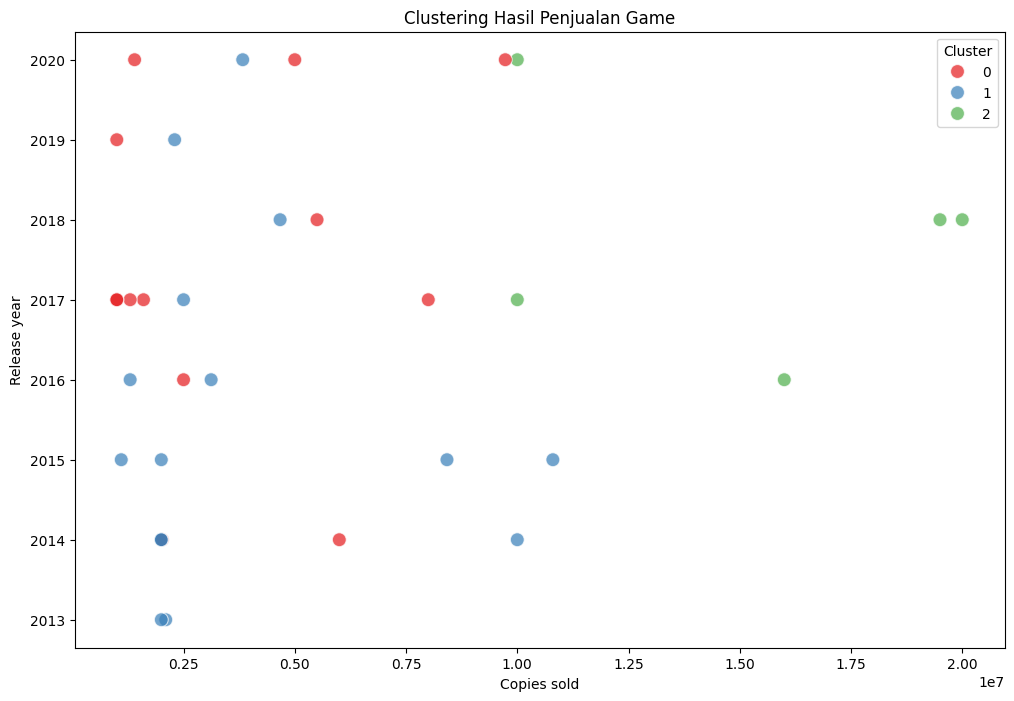

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membaca file CSV
file_path = '/content/sample_data/tb2.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama data
print("Beberapa baris pertama data:")
print(df.head())

# Konversi 'Release date' menjadi tipe datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# Ekstrak tahun dari 'Release date'
df['Release year'] = df['Release date'].dt.year

# Pembersihan dan konversi 'Copies sold'
def clean_copies_sold(value):
    if isinstance(value, str):
        value = value.replace(',', '').replace(' million', '')
        try:
            return float(value) * 1e6
        except ValueError:
            return np.nan
    return np.nan

df['Copies sold'] = df['Copies sold'].apply(clean_copies_sold)

# Encode kolom kategorikal
label_encoder = LabelEncoder()
df['Genre(s)'] = label_encoder.fit_transform(df['Genre(s)'])
df['Developer(s)'] = label_encoder.fit_transform(df['Developer(s)'])
df['Publisher(s)'] = label_encoder.fit_transform(df['Publisher(s)'])

# Pilih fitur untuk clustering
features = ['Copies sold', 'Release year', 'Genre(s)', 'Developer(s)', 'Publisher(s)']
X = df[features]

# Periksa apakah ada data yang hilang setelah pembersihan
print("Jumlah data yang hilang per kolom:")
print(X.isna().sum())

# Hapus baris dengan data yang hilang
X = X.dropna()

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan K-Means Clustering
n_clusters = 3  # Tentukan jumlah cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Menampilkan hasil clustering
print("Hasil clustering:")
print(df.head())

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))

# Scatter plot berdasarkan 'Copies sold' dan 'Release year'
sns.scatterplot(data=df, x='Copies sold', y='Release year', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Clustering Hasil Penjualan Game')
plt.xlabel('Copies sold')
plt.ylabel('Release year')
plt.legend(title='Cluster')
plt.show()


In [4]:
from sympy import symbols, diff, integrate

# Definisikan simbol-simbol
x = symbols('x')

# Fungsi
f = x**2 + 3*x - 2

# Turunan pertama
dfdx = diff(f, x)
print("Turunan pertama:", dfdx)

# Integral tak tentu
integral_f = integrate(f, x)
print("Integral tak tentu:", integral_f)


Turunan pertama: 2*x + 3
Integral tak tentu: x**3/3 + 3*x**2/2 - 2*x


In [5]:
import numpy as np

# Definisikan fungsi
def f(x):
    return x**2 + 3*x - 2

# Hitung nilai fungsi pada x = 2
hasil = f(2)
print("Nilai fungsi pada x = 2:", hasil)


Nilai fungsi pada x = 2: 8


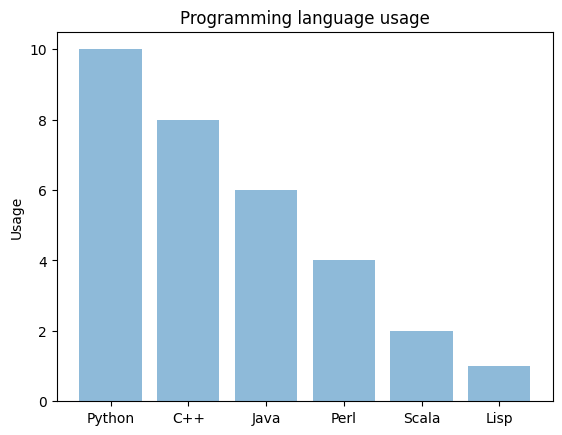

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10, 8, 6, 4, 2, 1]

# Create bars
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()


In [7]:
import pandas as pd
import numpy as np

# Buat DataFrame
data = {'Nilai': [80, 90, 75, 85, 95]}
df = pd.DataFrame(data)

# Hitung statistik deskriptif
print(df.describe())

# Hitung nilai rata-rata
rata_rata = df['Nilai'].mean()
print("Rata-rata nilai:", rata_rata)

# Hitung median
median = df['Nilai'].median()
print("Median nilai:", median)

# Hitung modus
modus = df['Nilai'].mode()
print("Modus nilai:", modus)


           Nilai
count   5.000000
mean   85.000000
std     7.905694
min    75.000000
25%    80.000000
50%    85.000000
75%    90.000000
max    95.000000
Rata-rata nilai: 85.0
Median nilai: 85.0
Modus nilai: 0    75
1    80
2    85
3    90
4    95
Name: Nilai, dtype: int64
